# Lineær regresjon - to variable

In [1]:
import numpy as np
import os
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

import ipywidgets as widgets
from sklearn.metrics import r2_score

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{00}& x_{10}& x_{20}&\dots& x_{j0} \\
1& x_{01}& x_{11}& x_{21}&\dots& x_{j1} \\
1& x_{02}& x_{12}& x_{22}&\dots& x_{j2} \\                      
\dots& \dots& \dots& \dots&\dots&\dots \\
1& x_{0i}& x_{1i}&x_{2i}&\dots&x_{ji} \\
\end{bmatrix}
$$

In [2]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# Make data set
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

x_mesh, y_mesh = np.meshgrid(x, y)
z = f(x_mesh, y_mesh)



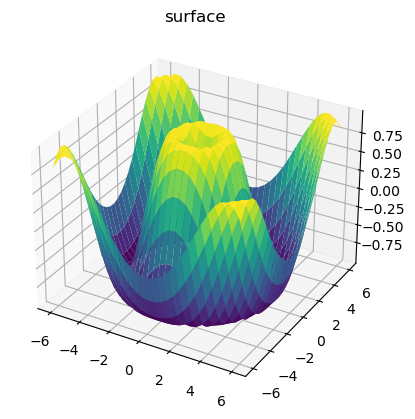

In [3]:
ax = plt.axes(projection='3d')
ax.plot_surface(x_mesh, y_mesh, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [4]:
# Stacking x and y 
X = np.moveaxis(np.vstack((x_mesh.ravel(), y_mesh.ravel())),0,-1)

#train model
linreg = LinearRegression()
linreg.fit(X,np.expand_dims(z.flatten(),-1))

LinearRegression()

C:\Users\Bjorn\AppData\Local\Temp\ipykernel_13792\3068498197.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


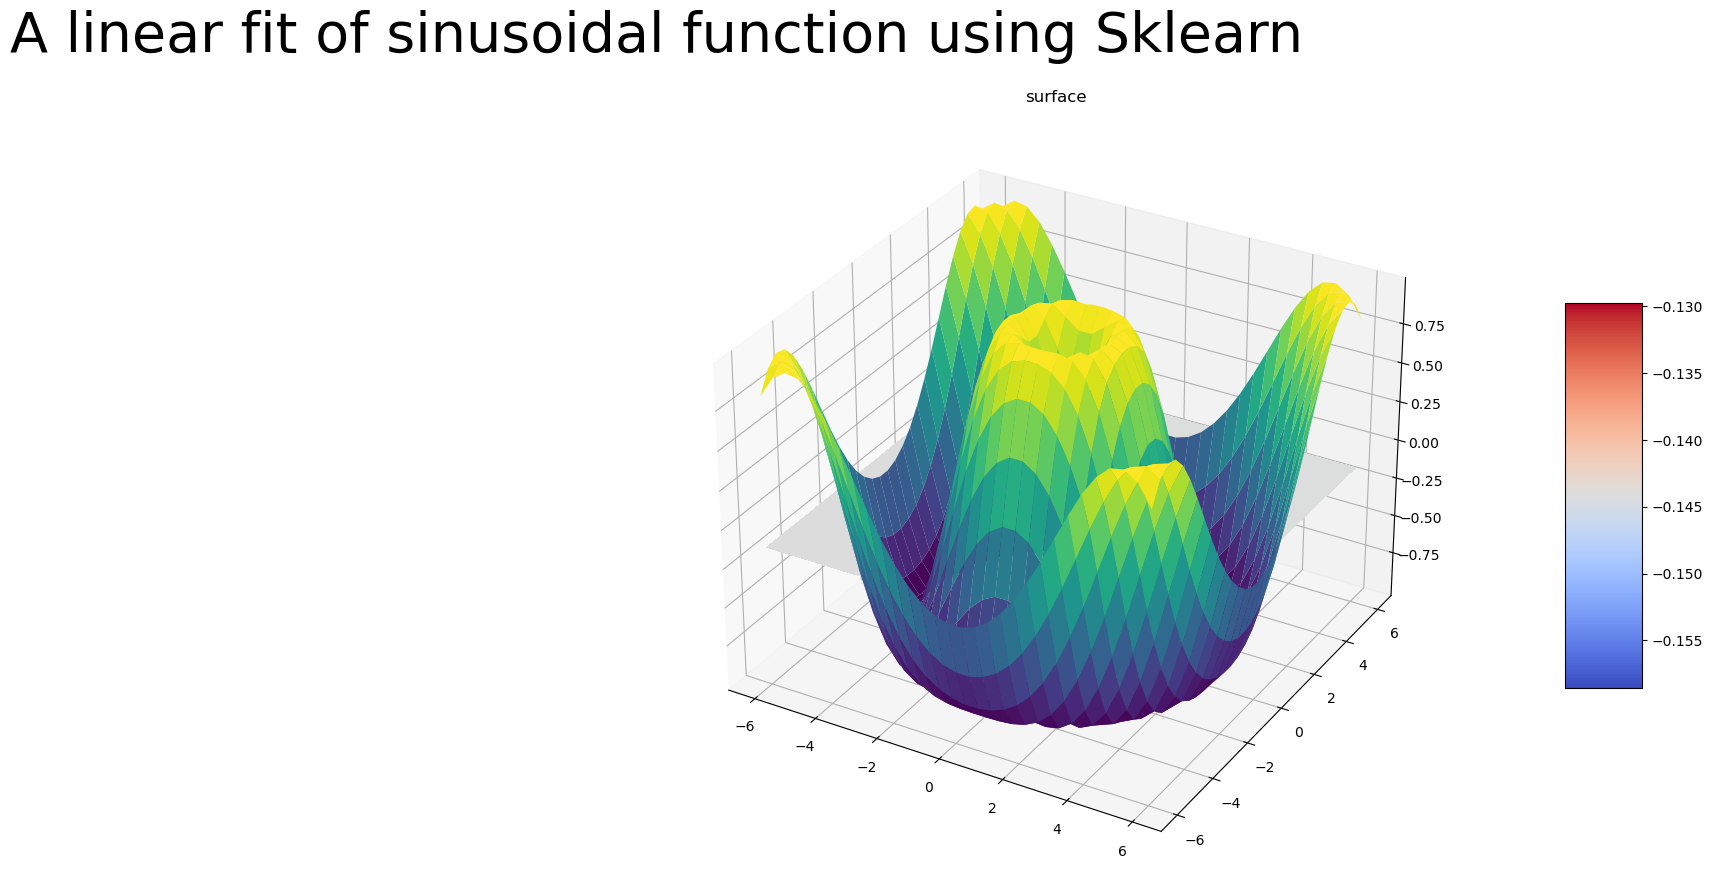

In [6]:
z_hat=linreg.predict(X)

z_hat_plot = z_hat.reshape(int(math.sqrt(z_hat.shape[0])),int(math.sqrt(z_hat.shape[0])))

fig = plt.figure(figsize=(32,10))
ax = plt.axes(projection='3d')

surf2 = ax.plot_surface(x_mesh, y_mesh, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

surf = ax.plot_surface(x_mesh, y_mesh, z_hat_plot, rstride=1, cstride=1,
            cmap='coolwarm', edgecolor='none',antialiased=False)

ax.set_title('surface')
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A linear fit of sinusoidal function using Sklearn" ,fontsize="40", color = "black")
fig.show()


C:\Users\Bjorn\AppData\Local\Temp\ipykernel_13792\1767934103.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


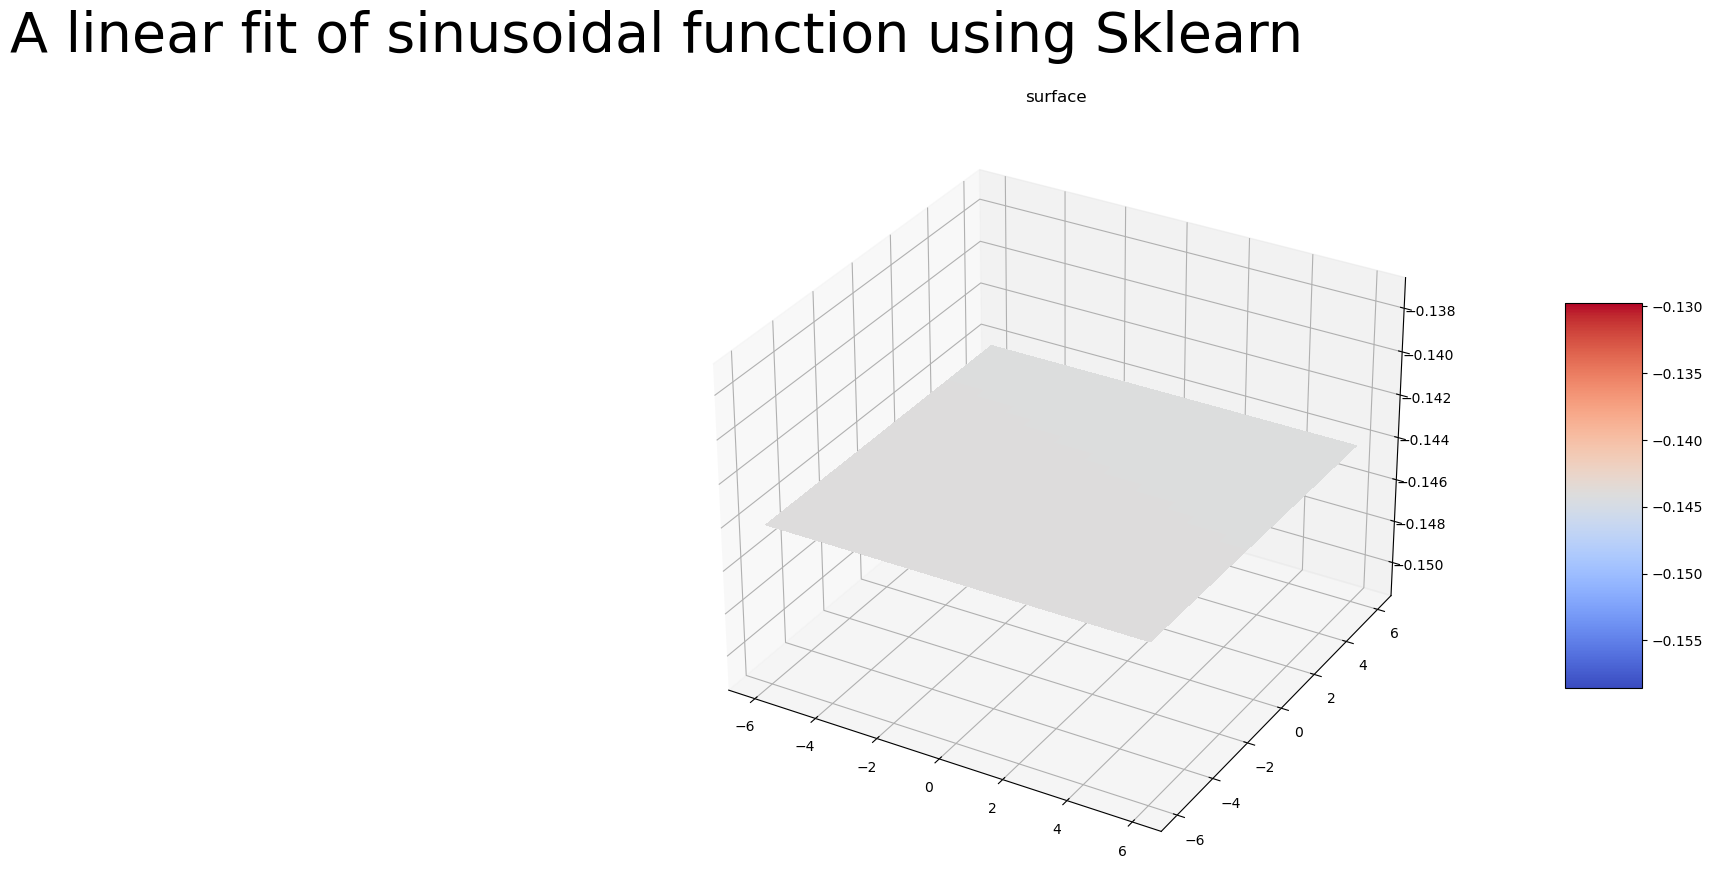

In [8]:
z_hat=linreg.predict(X)

z_hat_plot = z_hat.reshape(int(math.sqrt(z_hat.shape[0])),int(math.sqrt(z_hat.shape[0])))

fig = plt.figure(figsize=(32,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(x_mesh, y_mesh, z_hat_plot, rstride=1, cstride=1,
            cmap='coolwarm', edgecolor='none',antialiased=False)

ax.set_title('surface')
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A linear fit of sinusoidal function using Sklearn" ,fontsize="40", color = "black")
fig.show()
